# Despre baza de date

Baza de date consta intr-un tabel ce include toate filmele originale Netflix produse pana la 1 Iunie 2021. De asemenea sunt prezente si toate documentarele realizate de Netflix si toate special-urile. Majoritatea filmelor au peste 1000 review-uri pe IMDB.

Baza de date poate fi descarcata de pe [Kaggle](https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores). 

Continutul tabelului:

- Title: numele filmului
- Genre: genul sau genurile filmului 
- Premiere:  data de lansare a filmului
- Runtime: durata in minute
- IMDB scores : notele de pe IMDB pana la data de 01/06/21)
- Language: limba/limbile in care sunt disponibile filmele (pana la data de  01/06/21)

In [1]:
#Import librari
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('husl', 8) 

In [2]:
#Citire date
netflix=pd.read_csv('NetflixOriginals.csv')

In [3]:
netflix.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


# Pregatirea datelor pentru a putea fi importate in MySQL

**Update-ul randurilor care eu un format diferit al datei premierei filmului**

Unele randuri au un format diferit fata de cel acceptat. Exemplu: 'October 16. 2019' in loc de 'October 16, 2019'.


In [5]:
netflix.at[111,'Premiere']='October 16, 2019'

In [6]:
netflix.at[111,'Premiere']

'October 16, 2019'

In [7]:
netflix.at[308,'Premiere']='September 15, 2017'

In [8]:
netflix.at[387,'Premiere']='July 15, 2016'


In [9]:
netflix.at[538,'Premiere']='October 27, 2017'

In [10]:
netflix.at[541,'Premiere']='September 16, 2016'

**Creare functie care sa transforme formatul coloanei "Premiere" din object type in datetime type**

In [11]:
def str_to_date(x):
    return datetime.strptime(x, '%B %d, %Y')

In [12]:
netflix['Premiere']=netflix['Premiere'].apply(lambda x: str_to_date(x))

**Salvare date intr-un nou CSV pentru a putea fi folosit de Mysql**

In [ ]:
netflix.to_csv('netflix.csv')

# EDA

<AxesSubplot:>

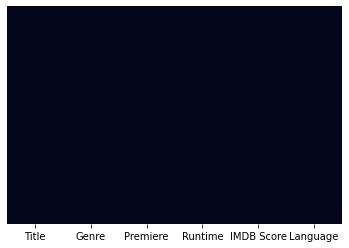

In [13]:
#Verific daca sunt date lipsa in tabel
sns.heatmap(netflix.isnull(),cbar=False,yticklabels=False,)

In [14]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    584 non-null    datetime64[ns]
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 27.5+ KB


In [15]:
netflix.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


**Crearea unei histograme care sa reprezinte distributie notelor de pe IMDB a filmelor din tabel**

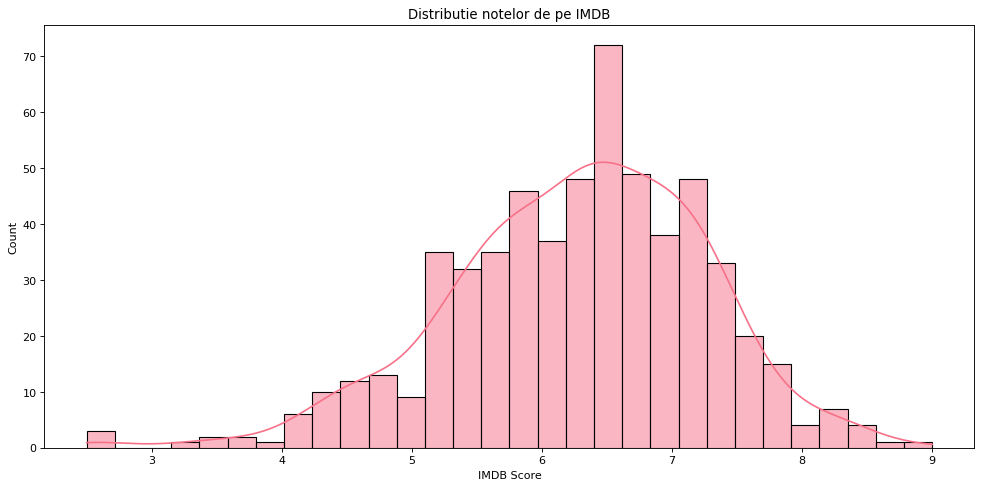

In [16]:
plt.figure(figsize=(15,7), dpi=80)
sns.histplot(data=netflix,x='IMDB Score',bins=30,kde=True)
plt.title('Distributie notelor de pe IMDB')

plt.show()

**Crearea unei histograme care sa reprezinte distributie duratei filmelor**

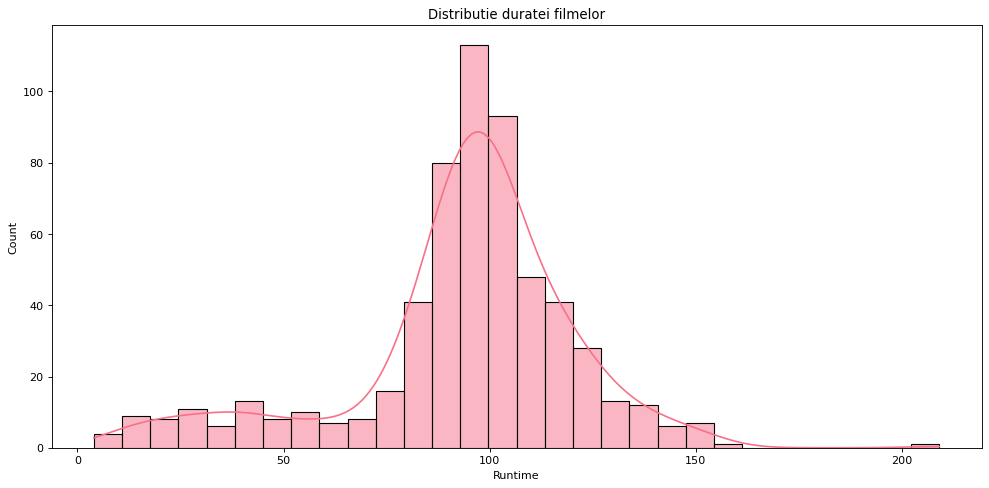

In [17]:
plt.figure(figsize=(15,7), dpi=80)
sns.histplot(data=netflix,x='Runtime',bins=30,kde=True)
plt.title('Distributie duratei filmelor')

plt.show()

**Crearea unei joint plot intre notele si durata unui film, impartind filmele in 2 categori 'Short Film' si 'Feature Film'**

In [18]:
#Adaug o noua coloana care sa imparta filmele in 'Short Film' si 'Feature Film' in functie de durata filmului.
#Productiile de pana in 40 minute vor fi incadrate la 'Short film', iar cele mai lungi de 40 minute vor fi condiderate 'Feature Film'.

def film_category(x):
    if x < 40:
        return 'Short Film'
    elif x > 40:
        return 'Feature Film'



In [19]:
netflix['Category']=netflix['Runtime'].apply(lambda x: film_category(x))

In [20]:
netflix

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Category
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,Feature Film
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,Feature Film
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,Feature Film
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,Feature Film
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,Feature Film
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,Feature Film
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,Feature Film
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,Feature Film
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,Feature Film


<Figure size 1200x560 with 0 Axes>

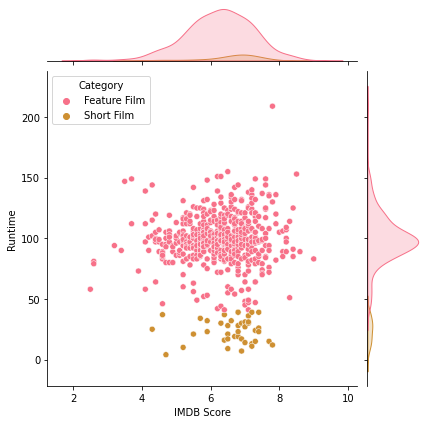

In [21]:
#Joint plot intre notele de pe IMDB si durata filmului
plt.figure(figsize=(15,7), dpi=80)
sns.jointplot(data=netflix,x='IMDB Score',y='Runtime', hue='Category')

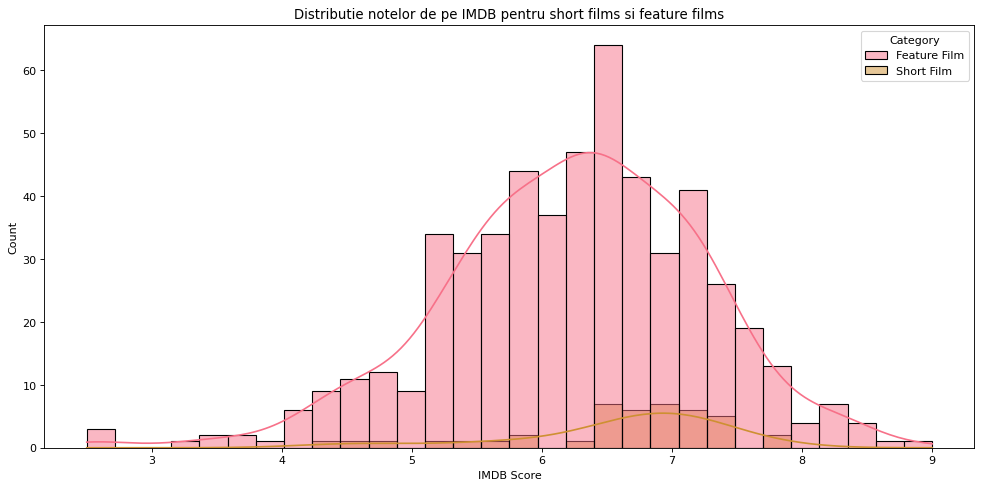

In [22]:
#Recreerea histogramei notelor de pe IMDB cu hue='Category'
plt.figure(figsize=(15,7), dpi=80)
sns.histplot(data=netflix,x='IMDB Score',bins=30,kde=True, hue='Category')
plt.title('Distributie notelor de pe IMDB pentru short films si feature films')

plt.show()

Se observa o distributie spre dreapta a categoriei 'Short Film', lucru care inseamna ca au o nota mai buna in medie pe IMDB, fata de 'Feature films'

**Care sunt genurile de filme produse cel mai frecvent de Netflix?**

In [43]:
topgenre = netflix['Genre'].value_counts().nlargest(10)

In [44]:
topgenre

Documentary        159
Drama               77
Comedy              49
Romantic comedy     39
Thriller            33
Comedy-drama        14
Crime drama         11
Biopic               9
Horror               9
Action               7
Name: Genre, dtype: int64

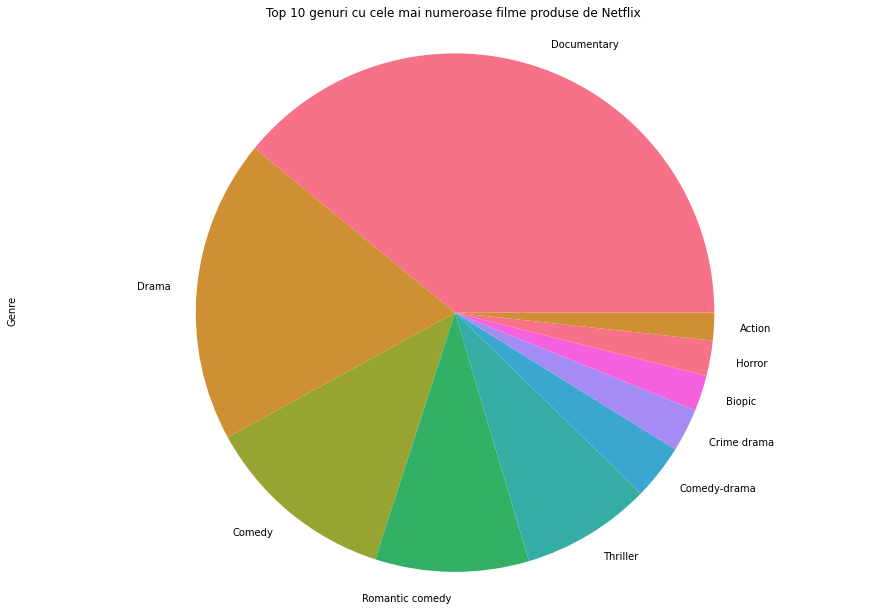

In [60]:
fig=plt.figure()
fig.add_axes([0,0,2,2])
topgenre.plot(kind='pie')
plt.title('Top 10 genuri cu cele mai numeroase filme produse de Netflix')
plt.axis('equal')
plt.show()

Productiile Netflix sunt compuse in mare parte din documentare, urmate de drame, comedii, comedii-romantice si thrillere.

**Cate filme au fost produse in fiecare an?(pana la 01/06/2021)** 

In [71]:
netflix['Year'] = netflix['Premiere'].dt.year

In [72]:
netflix.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Category,Year
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,Feature Film,2019
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,Feature Film,2020
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,Feature Film,2019
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,Feature Film,2018
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,Feature Film,2020


<AxesSubplot:xlabel='Year', ylabel='count'>

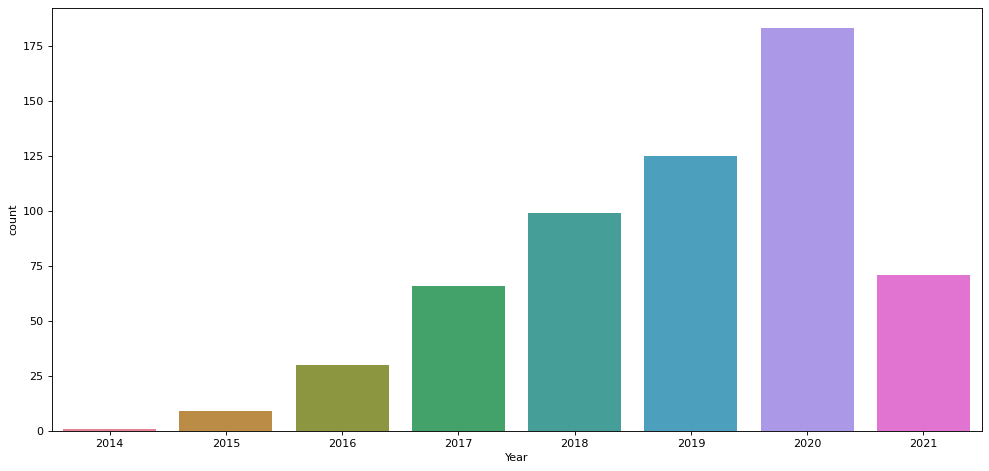

In [73]:
plt.figure(figsize=(15,7), dpi=80)
sns.countplot(x='Year', data=netflix)